# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Classes.processing as pr
import matplotlib.patches as patches

# Input

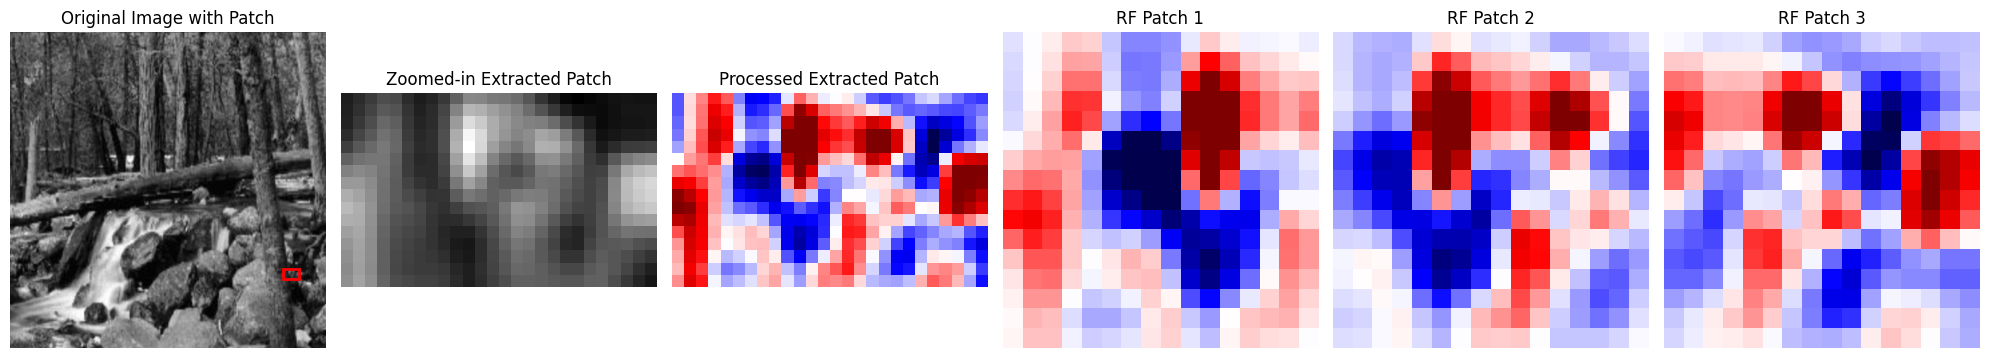

In [53]:
# --- Your preprocessing pipeline ---
prep = pr.Input()
sz = 512

prep.input_read(input_type='image', file_format='.png',
                input_directory='./dataset/rao',
                data_type='processed', size=sz, channel=1, dt=2)

processing_params = {
    "zero_mean": True,
    "status": True,
    "type": "Whiten",
    "f_0": 200,
    "n": 4,
    "scale": 0.2
}

prep.processing(params=processing_params, save_directory="./new/")

patch_size = [16, 26]  # height, width
prep.create_patch(patch_size=patch_size)

RF_size = [16, 16]
prep.create_RFpatch(RF_size=RF_size, overlap_size=[6, 10], process_flg=True)

# --- Corrected visualization section ---

image_idx = np.random.randint(len(prep.input_mat))
patch_idx = np.random.randint(prep.RF_patches.shape[1])

# Select image and calculate the exact position based on correct indexing
image = prep.input_mat[image_idx]
patch_height, patch_width = patch_size

# Correct indexing
nx = (sz - patch_width) // patch_width + 1
y = (patch_idx // nx) * patch_height
x = (patch_idx % nx) * patch_width

# Prepare plot
fig, axs = plt.subplots(1, 6, figsize=(20, 6))

# 1. Original Image with highlighted patch
axs[0].imshow(image, cmap='gray')
rect = patches.Rectangle((x, y), patch_width, patch_height, linewidth=2, edgecolor='red', facecolor='none')
axs[0].add_patch(rect)
axs[0].set_title("Original Image with Patch")
axs[0].axis('off')

# 2. Zoomed-in extracted patch from original image
zoom_patch = image[y:y+patch_height, x:x+patch_width]
axs[1].imshow(zoom_patch, cmap='gray')
axs[1].set_title("Zoomed-in Extracted Patch")
axs[1].axis('off')

# 3. Extracted processed patch
extracted_patch = prep.patches_list[image_idx][patch_idx]
axs[2].imshow(extracted_patch, cmap='seismic', vmin=-1, vmax=1)
axs[2].set_title("Processed Extracted Patch")
axs[2].axis('off')

# 4-5. Two RF Patches extracted from processed patch
# Plot the selected RF patches
ptch = np.squeeze(prep.RF_patches[image_idx, patch_idx])[0]
axs[3].imshow(ptch, cmap='seismic', vmin=-0.005, vmax=0.005)
axs[3].set_title('RF Patch 1')
axs[3].axis('off')

ptch = np.squeeze(prep.RF_patches[image_idx, patch_idx])[1]
axs[4].imshow(ptch, cmap='seismic', vmin=-0.005, vmax=0.005)
axs[4].set_title('RF Patch 2')
axs[4].axis('off')

ptch = np.squeeze(prep.RF_patches[image_idx, patch_idx])[2]
axs[5].imshow(ptch, cmap='seismic', vmin=-0.005, vmax=0.005)
axs[5].set_title('RF Patch 3')
axs[5].axis('off')

plt.tight_layout()
plt.show()


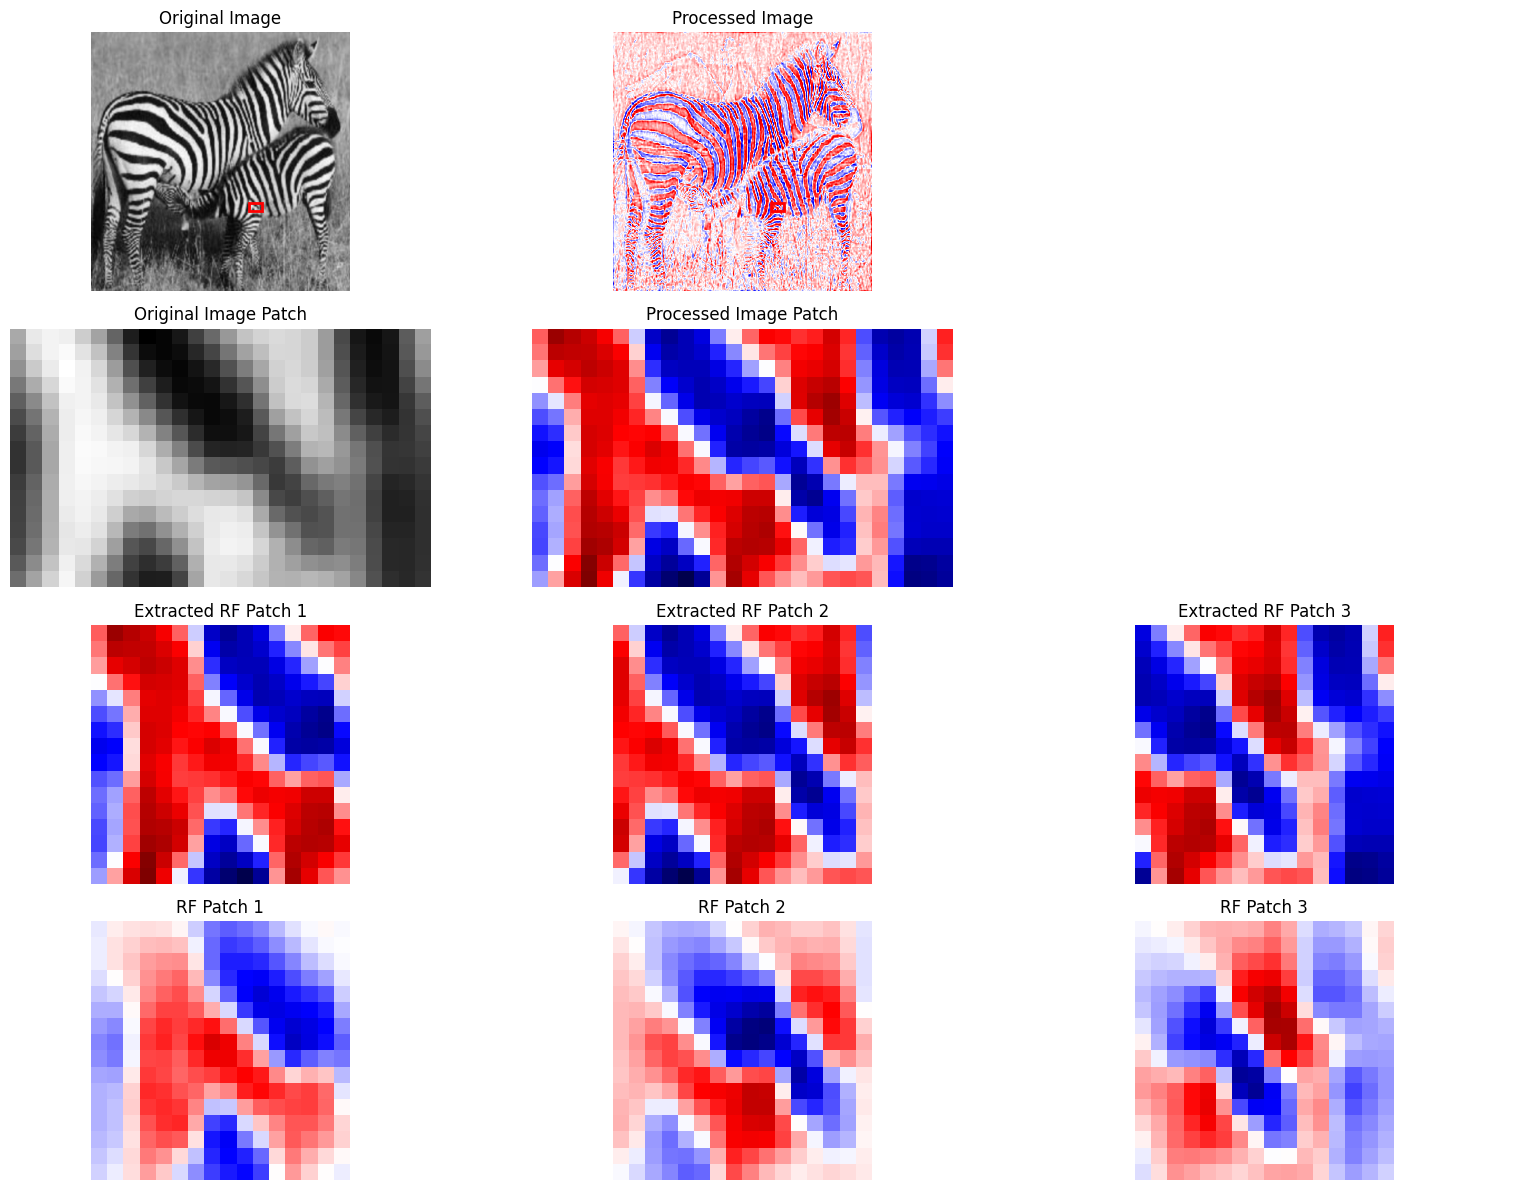

RF patch shape: (1, 3, 16, 16)


In [89]:


# --- Your preprocessing pipeline ---
prep = pr.Input()
sz = 512

prep.input_read(input_type='image', file_format='.png',
                input_directory='./dataset/rao',
                data_type='processed', size=sz, channel=1, dt=2)

processing_params = {
    "zero_mean": True,
    "status": True,
    "type": "Whiten",
    "f_0": 200,
    "n": 4,
    "scale": 0.2
}

prep.processing(params=processing_params, save_directory="./new/")

patch_size = [16, 26]  # height, width
prep.create_patch(patch_size=patch_size)

RF_size = [16, 16]
overlap_size = [6, 10]
prep.create_RFpatch(RF_size=RF_size, overlap_size=overlap_size, process_flg=True)

# --- Corrected and structured visualization ---

image_idx = np.random.randint(len(prep.input_mat))
image_idx = 1
patch_idx = np.random.randint(prep.RF_patches.shape[1])
patch_idx= 411

image = prep.input_mat[image_idx]
processed_image = prep.proc_input[image_idx]
patch_height, patch_width = patch_size

nx = (sz - patch_width) // patch_width + 1
y = (patch_idx // nx) * patch_height
x = (patch_idx % nx) * patch_width

fig, axs = plt.subplots(4, 3, figsize=(16, 12))

# Row 1: Original and processed images
axs[0, 0].imshow(image, cmap='gray')
rect_orig = patches.Rectangle((x, y), patch_width, patch_height, linewidth=2, edgecolor='red', facecolor='none')
axs[0, 0].add_patch(rect_orig)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

axs[0, 1].imshow(processed_image, cmap='seismic')
rect_proc = patches.Rectangle((x, y), patch_width, patch_height, linewidth=2, edgecolor='red', facecolor='none')
axs[0, 1].add_patch(rect_proc)
axs[0, 1].set_title("Processed Image")
axs[0, 1].axis('off')
axs[0, 2].axis('off')  # Unused subplot

# Row 2: Original and processed patches
original_patch = image[y:y+patch_height, x:x+patch_width]
axs[1, 0].imshow(original_patch, cmap='gray')
axs[1, 0].set_title("Original Image Patch")
axs[1, 0].axis('off')

processed_patch = prep.patches_list[image_idx][patch_idx]
axs[1, 1].imshow(processed_patch, cmap='seismic')
axs[1, 1].set_title("Processed Image Patch")
axs[1, 1].axis('off')
axs[1, 2].axis('off')  # Unused subplot

# Row 3: RF extraction regions from the processed patch (fixed indexing)
for idx in range(3):
    start_x = idx * 5
    
    RF_patch_corrected = processed_patch[
        0:RF_size[0],
        start_x:start_x + RF_size[1]
    ]
    
    axs[2, idx].imshow(RF_patch_corrected, cmap='seismic',
                       vmin=np.min(processed_patch),
                       vmax=np.max(processed_patch))
    axs[2, idx].set_title(f"Extracted RF Patch {idx+1}")
    axs[2, idx].axis('off')


# Row 4: Display the RF patches again (for clarity)
RF_ptchs = np.squeeze(prep.RF_patches[image_idx, patch_idx])
for idx in range(3):
    axs[3, idx].imshow(RF_ptchs[idx], cmap='seismic',
                       vmin=-0.01,
                       vmax=0.01)
    axs[3, idx].set_title(f"RF Patch {idx+1}")
    axs[3, idx].axis('off')

plt.tight_layout()
plt.show()

# Check RF patch shape
print("RF patch shape:", prep.RF_patches[image_idx, patch_idx].shape)


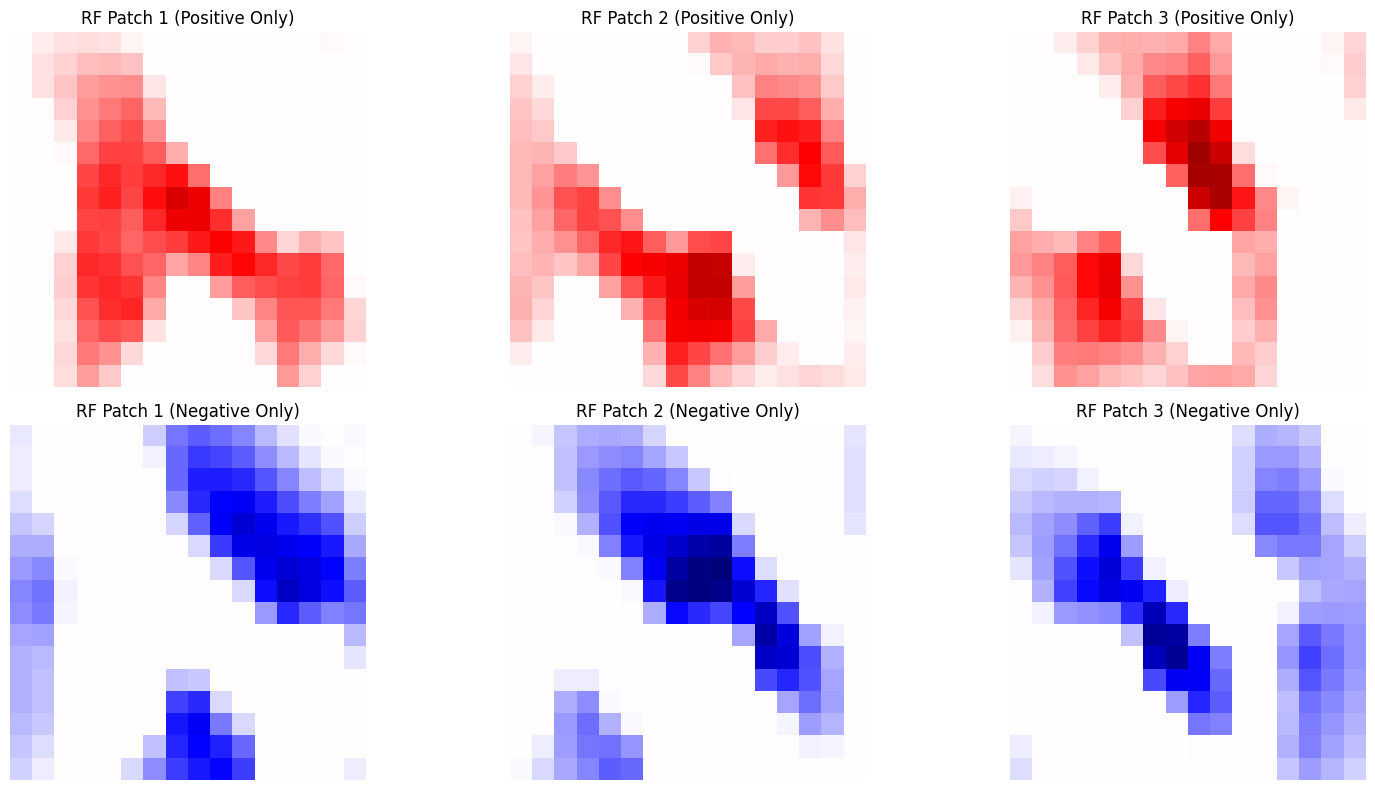

In [91]:
# Add two additional rows: positive-only and negative-only values
fig_extra, axs_extra = plt.subplots(2, 3, figsize=(16, 8))

# Positive-only RF patches (negative values set to zero)
for idx in range(3):
    positive_patch = np.copy(RF_ptchs[idx])
    positive_patch[positive_patch < 0] = 0

    axs_extra[0, idx].imshow(positive_patch, cmap='seismic', vmin=-0.01, vmax=0.01)
    axs_extra[0, idx].set_title(f"RF Patch {idx+1} (Positive Only)")
    axs_extra[0, idx].axis('off')

# Negative-only RF patches (positive values set to zero)
for idx in range(3):
    negative_patch = np.copy(RF_ptchs[idx])
    negative_patch[negative_patch > 0] = 0

    axs_extra[1, idx].imshow(negative_patch, cmap='seismic', vmin=-0.01, vmax=0.01)
    axs_extra[1, idx].set_title(f"RF Patch {idx+1} (Negative Only)")
    axs_extra[1, idx].axis('off')

plt.tight_layout()
plt.show()


In [76]:
RF_size

[16, 16]

In [86]:
patch_idx

411